Apply the specified unsupervised ML algorithms on the given dataset
K Means CLustering ( Find the value of k using Elbow method)
Hierarchical clustering
DBSCAN 

**Author : Nagasai Panuganti**



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN

In [2]:
df=pd.read_csv("StudentsPerformance.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
df.rename(columns={'race/ethnicity':'race'}, inplace=True)


In [6]:
x=df.iloc[:,5:]

K- MEANS ALGORITHM

In [7]:
#Elbow method to find K-value
error = []
k_range = range(1,10)
for k in k_range:
    kms = KMeans(n_clusters=k)
    kms.fit(x)
    error.append(kms.inertia_)

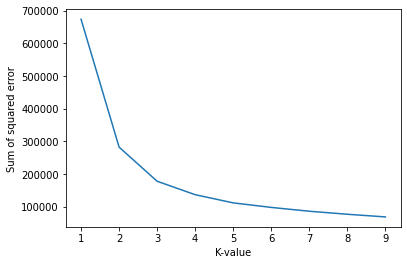

In [8]:
plt.xlabel('K-value')
plt.ylabel('Sum of squared error')
plt.plot(k_range,error)

In [9]:
#From above graph, we select K-value=3
kms=KMeans(n_clusters=3)
kms.fit(x)
kms.labels_

array([2, 1, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 1, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 2, 0, 1, 1, 2,
       2, 1, 2, 0, 2, 0, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 2, 2, 2,
       1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 0, 1, 2, 2, 1, 2, 2, 2, 0,
       2, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 0, 1, 2, 1, 2, 2, 1, 0, 2, 0,
       0, 1, 1, 2, 2, 2, 0, 2, 2, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0,
       2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 2, 1,
       0, 0, 2, 1, 1, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 1,
       2, 0, 2, 2, 1, 2, 2, 0, 0, 2, 1, 1, 1, 2, 1, 2, 0, 0, 1, 2, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 0, 1, 1,

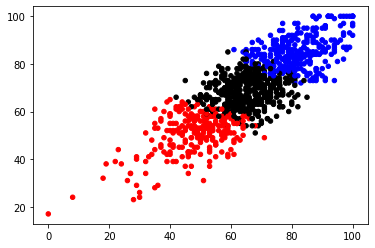

In [10]:
#plot 
colors=np.array(['red','blue','black'])
plt.scatter(x.iloc[:,0], x.iloc[:,1],c=colors[kms.labels_],s=20 )

DBSCAN ALGORITHM

In [11]:
#to find eps value
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

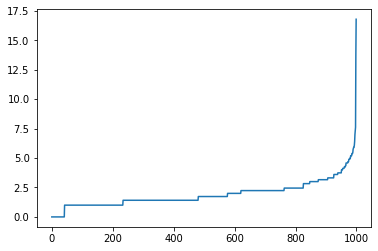

In [12]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


In [13]:
#From above graph,we can fix eps=3 
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3, metric='euclidean', min_samples=8)

In [14]:
dbscan.fit(x)

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=8, n_jobs=None, p=None)

In [15]:
#DBSCAN LABELS
clusters=dbscan.labels_
clusters

array([ 0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  1, -1, -1,  0, -1,  0, -1,
       -1, -1,  7,  0,  0,  2,  0, -1,  0, -1,  0,  0,  0,  0,  0, -1, -1,
       -1,  0,  4, -1,  5,  1, -1,  0,  7,  0,  2, -1, -1,  0, -1,  0,  3,
        0, -1, -1, -1, -1, -1,  3,  0, -1,  0, -1,  0, -1,  0,  0, -1,  0,
        0, -1, -1, -1, -1,  0, -1, -1, -1,  0,  0,  0,  2, -1, -1,  0, -1,
        4, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  3,  2, -1, -1, -1,  0, -1,
       -1,  5, -1, -1,  0, -1, -1,  0,  0, -1,  2, -1, -1, -1,  4,  0, -1,
       -1, -1,  0, -1,  0,  0,  6, -1, -1, -1, -1,  0,  0, -1,  0,  0,  0,
       -1,  0, -1,  0,  0, -1,  0, -1,  5,  2,  3,  5, -1,  3, -1,  0,  0,
        0, -1,  0,  0,  6,  5, -1,  0, -1, -1,  0, -1, -1,  0, -1,  0, -1,
        0, -1,  5,  0,  0,  0, -1,  0,  0,  0, -1,  2,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0, -1,  0, -1, -1,  1, -1, -1, -1, -1,  0,  0, -1,
       -1, -1, -1, -1,  2

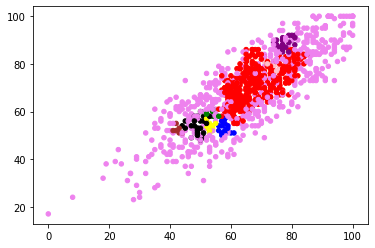

In [16]:
#plot
colors=np.array(['red','blue','black','yellow','pink','purple','brown','green','violet'])
plt.scatter(x.iloc[:,0], x.iloc[:,1],c=colors[clusters],s=20 )

HIERARCHICAL CLUSTERING

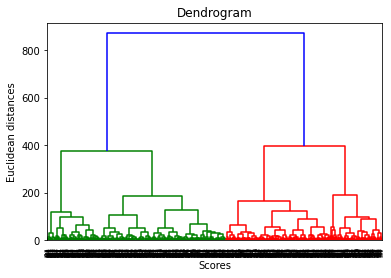

In [17]:
dendrogram = sch.dendrogram(sch.linkage(x, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Scores')
plt.ylabel('Euclidean distances')
plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

In [19]:
hcc=hc.fit_predict(x)

In [20]:
hcc

array([0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 1, 2, 2, 0,
       1, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 0, 0, 0,
       2, 0, 0, 1, 0, 1, 0, 0, 2, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2,
       0, 2, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 2, 1, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 2, 1,
       2, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       2, 0, 2, 0, 0, 2, 1, 0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 2, 2, 2,
       1, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 1, 0, 2,
       0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 2, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0,
       2, 1, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0,

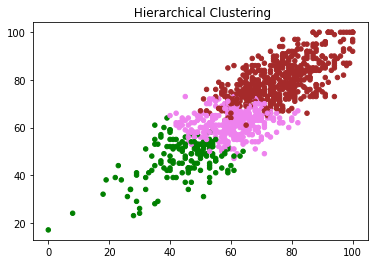

In [21]:
#plot 
colors=np.array(['brown','green','violet'])
plt.scatter(x.iloc[:,0], x.iloc[:,1],c=colors[hcc],s=20 )
plt.title(' Hierarchical Clustering')
plt.show()

GRAPHS


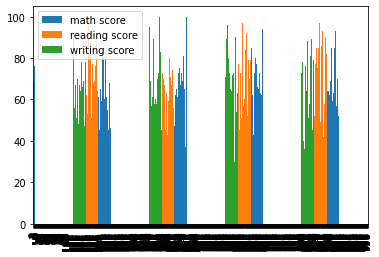

In [22]:
df.plot.bar()

           
**The below graph is to show number of female and male when dataframe is** **grouped by 'gender'.** 

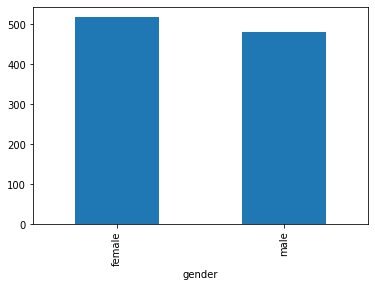

In [23]:
groups = df.groupby(['gender']).size()
groups.plot.bar()

           
**The below graph is to show number of people in different races like group A, group B,etc. when dataframe is** **grouped by 'race'.** 

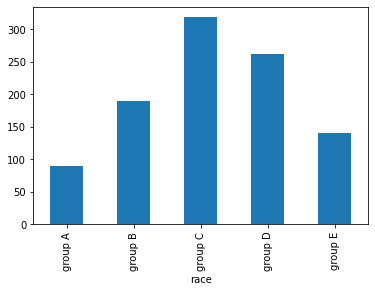

In [24]:
groups = df.groupby(['race']).size()
groups.plot.bar()

**The below graph is when grouped by gender.** 

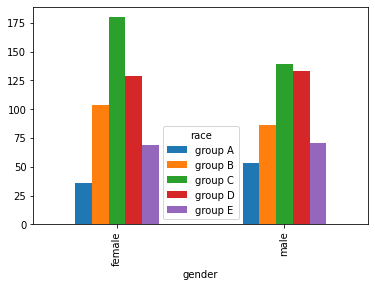

In [25]:
pd.crosstab(df['gender'],df['race']).plot.bar()

**The below graph is when grouped by different races.** 

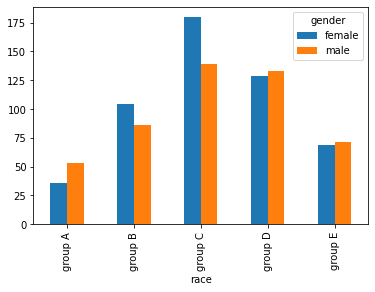

In [26]:
pd.crosstab(df['race'],df['gender']).plot.bar()

In [27]:
#renaming column name of dataframe from "math score" to "math"
df.rename(columns={'math score':'math'}, inplace=True)

**The below graph is to group by different races and show math scores scored in that particular race.** 

In [28]:
#used plotly library for data visualisation
import plotly.io as pio

subject = df.race
score = df.math

data = [dict(
  type = 'scatter',
  x = subject,
  y = score,
  mode = 'markers',
  transforms = [dict(
    type = 'groupby',
    groups = subject
  )]
)]

fig_dict = dict(data=data)
pio.show(fig_dict, validate=False)